### Create a spark session and import the required libraries

In [1]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 199 kB 44.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=d2e722d81119dd7b2119b77265bb8b82a69a5d533b74689eea98672c091003bf
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = (SparkSession.builder.getOrCreate())

### Create a data schema programatically

In [3]:
from pyspark.sql.types import *
schema = StructType([StructField('id',IntegerType(),True),
                    StructField("gender", StringType(), True),
                    StructField("age", DoubleType(), True),
                     StructField("hypertension", IntegerType(), True),
                     StructField("heart_disease", IntegerType(), True),
                     StructField("ever_married", StringType(), True),
                     StructField("work_type", StringType(), True),
                     StructField("Residence_type", StringType(), True),
                     StructField("avg_glucose_level", DoubleType(), True),
                     StructField("bmi", DoubleType(), True),
                     StructField("smoking_status", StringType(), True),
                     StructField("stroke", IntegerType(), True)])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [4]:
df=spark.read.csv("/content/healthcare-dataset-stroke-data.csv",schema=schema,header=True)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [5]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [6]:
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [7]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [8]:
df.select('stroke').groupBy('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  249|
|     0| 4861|
+------+-----+



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


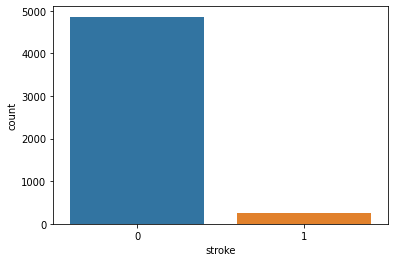

In [9]:
import seaborn as sns
sns.countplot(df.select('stroke').toPandas()['stroke'])

In [10]:
## Data is Highly Imbalanced

### Data is Highly Imbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


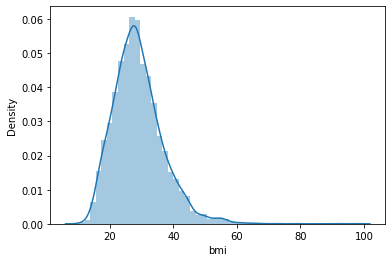

In [11]:
sns.distplot(df.select('bmi').toPandas()['bmi'],bins=50)

In [12]:
#bmi columns has outliers

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [13]:
df.select('age').describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [14]:
df = df.filter('age >= 2')

In [15]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [16]:
df.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [17]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [18]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [19]:
df = df.withColumn("gender", when(col("gender") == "Male",1).otherwise(0))

In [20]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|     0|79.0|           1|            0|         

In [21]:
df = df.withColumn("smoking_status", when(col("smoking_status") == "never smoked",0) \
                   .when(col("smoking_status") == "Unknown",0.5) \
                   .when(col("smoking_status") == "formerly smoked",0.75)\
                   .when(col("smoking_status") == "smokes",1.0)) 

In [22]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Sel

In [23]:
df = df.withColumn("gender",col("gender").cast(IntegerType()))
df = df.withColumn("smoking_status",col("smoking_status").cast(DoubleType()))
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [24]:
df.select('gender','smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [25]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [26]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|195|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [27]:
from pyspark.ml.feature import *
imputer = Imputer(inputCol="bmi",strategy ='median',outputCol="bmi")

In [28]:
df=imputer.fit(df).transform(df)

In [29]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [30]:
trainDF, testDF = df.randomSplit([.8,.2],seed=42)
print(f"There are {trainDF.count()} rows in the training set, and {testDF.count()} in the test set")

There are 4037 rows in the training set, and 953 in the test set


In [32]:
# trainDF.write.parquet("trainDF.parquet")
# testDF.write.parquet("testDF.parquet")

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [33]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [34]:
trainDF.dtypes

[('id', 'int'),
 ('gender', 'int'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'double'),
 ('smoking_status', 'double'),
 ('stroke', 'int')]

In [35]:
categoricalCols = [field for (field, dataType) in trainDF.dtypes
                  if dataType == 'string']

In [36]:
categoricalCols

['ever_married', 'work_type', 'Residence_type']

In [37]:
indexOutputCols = [x + "_Index" for x in categoricalCols]
indexOutputCols

['ever_married_Index', 'work_type_Index', 'Residence_type_Index']

In [38]:
oheOutputCols = [x + "_OHE" for x in categoricalCols]
oheOutputCols

['ever_married_OHE', 'work_type_OHE', 'Residence_type_OHE']

In [39]:
stringIndexer = StringIndexer(inputCols=categoricalCols,
                              outputCols=indexOutputCols,
                             handleInvalid='skip')

In [40]:
oheEncoder = OneHotEncoder(inputCols=indexOutputCols,
                          outputCols=oheOutputCols)

In [41]:
numericCols = [field for (field,dataType) in trainDF.dtypes
              if ((dataType!='string')&(field!='stroke')&(field!='id'))]
numericCols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [42]:
assemblerInputs = oheOutputCols + numericCols
assemblerInputs

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [43]:
vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

In [44]:
lr = LogisticRegression(featuresCol='features',
                      labelCol='stroke',
                      predictionCol='prediction')

In [45]:
pipeline = Pipeline(stages=[stringIndexer,oheEncoder,
                           vecAssembler,lr])

In [46]:
pipelineModel = pipeline.fit(trainDF)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [47]:
predDF = pipelineModel.transform(testDF)

In [48]:
predDF.select('features').show()

+--------------------+
|            features|
+--------------------+
|(13,[0,1,5,6,7,10...|
|(13,[1,5,7,10,11]...|
|(13,[0,1,7,10,11]...|
|(13,[0,1,7,10,11,...|
|(13,[0,1,5,6,7,10...|
|(13,[0,1,7,10,11]...|
|(13,[0,2,6,7,8,10...|
|(13,[0,2,5,7,10,1...|
|(13,[4,7,10,11,12...|
|(13,[0,1,6,7,10,1...|
|(13,[0,3,6,7,10,1...|
|(13,[1,7,8,9,10,1...|
|(13,[1,6,7,10,11]...|
|(13,[0,2,7,10,11,...|
|(13,[0,1,7,8,10,1...|
|(13,[0,3,5,7,10,1...|
|(13,[1,5,7,10,11]...|
|[1.0,1.0,0.0,0.0,...|
|[1.0,0.0,0.0,1.0,...|
|(13,[1,5,7,10,11]...|
+--------------------+
only showing top 20 rows



In [49]:
predDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [50]:
predDF.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [51]:
DfStroke1 = predDF.filter('stroke == 1')

In [52]:
DfStroke1.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+------------------+---------------+--------------------+----------------+-------------+------------------+--------------------+--------------------+--------------------+----------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|ever_married_Index|work_type_Index|Residence_type_Index|ever_married_OHE|work_type_OHE|Residence_type_OHE|            features|       rawPrediction|         probability|prediction|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+------------------+---------------+--------------------+----------------+-------------+------------------+--------------------+--------------------+--------------------+----------+
|  491|     0|74.0|           0|            0|         Yes

In [53]:
DfStroke1.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [54]:
## When stroke=1 the prediction=0

In [55]:
predDF.select('prediction').groupby('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  953|
+----------+-----+



In [56]:
#due to high imbalance the model only predicted the majority class

### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [57]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [58]:
Binary_Evaluator= BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                         labelCol='stroke',metricName='areaUnderROC')

In [59]:
Binary_Evaluator.evaluate(predDF)

0.5

In [60]:
#meaning the model almost has no predictive power

In [61]:
count1=trainDF.select('stroke').groupby('stroke').count().filter('stroke==1').head()[1]
count0=testDF.select('stroke').groupby('stroke').count().filter('stroke==0').head()[1]
r1=count1/(count1+count0)
r0=count0/(count1+count0)
dic={0:r1,1:r0}

In [62]:
dic

{0: 0.18214607754733994, 1: 0.8178539224526601}

In [63]:
from pyspark.sql.functions import udf
imbalance_weight=udf(lambda x :dic[x],DoubleType())
trainDF2=trainDF.withColumn('weight',imbalance_weight('stroke'))

In [64]:
trainDF2.select('stroke','weight').show()

+------+-------------------+
|stroke|             weight|
+------+-------------------+
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     1| 0.8178539224526601|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
|     0|0.18214607754733994|
+------+-------------------+
only showing top 20 rows



In [65]:
lr2 = LogisticRegression(featuresCol='features',
                      labelCol='stroke',
                      predictionCol='prediction',
                      maxIter=200,
                      weightCol='weight')

In [66]:
pipeline = Pipeline(stages=[stringIndexer,oheEncoder,
                           vecAssembler,lr2])

In [67]:
pipelineModel = pipeline.fit(trainDF2)

In [68]:
predDF2 = pipelineModel.transform(testDF)

In [69]:
Binary_Evaluator= BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                         labelCol='stroke',metricName='areaUnderROC')

In [70]:
Binary_Evaluator.evaluate(predDF2)

0.6045251905469538